[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schwartz-cnl/Computational-Neuroscience-Class/blob/main/Convolutional%20Neural%20Network/VisualizeGaborlikeAlexnet_class_2025.ipynb)

In [ ]:
# We want to visualize the first convolutional layer of Alexnet filters
# We will use a pretrained model from Pytorch

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.stats import rayleigh
import sys
import os

from torchvision import models

model = models.alexnet(pretrained=True)
print(model)
first_conv_layer = model.features[0]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 119MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# We can visualize first layer filters directly. See how they are qualitatively
# similar to what we saw with ICA and to V1 oriented Gabor-like filters

first_conv_layer = model.features[0]
print("\nFirst Convolutional Layer:")
print(first_conv_layer)

# Extract the weights from the first convolutional layer
filters = first_conv_layer.weight.data.cpu().numpy()  # Convert to NumPy for visualization





First Convolutional Layer:
Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


(3, 11, 11)


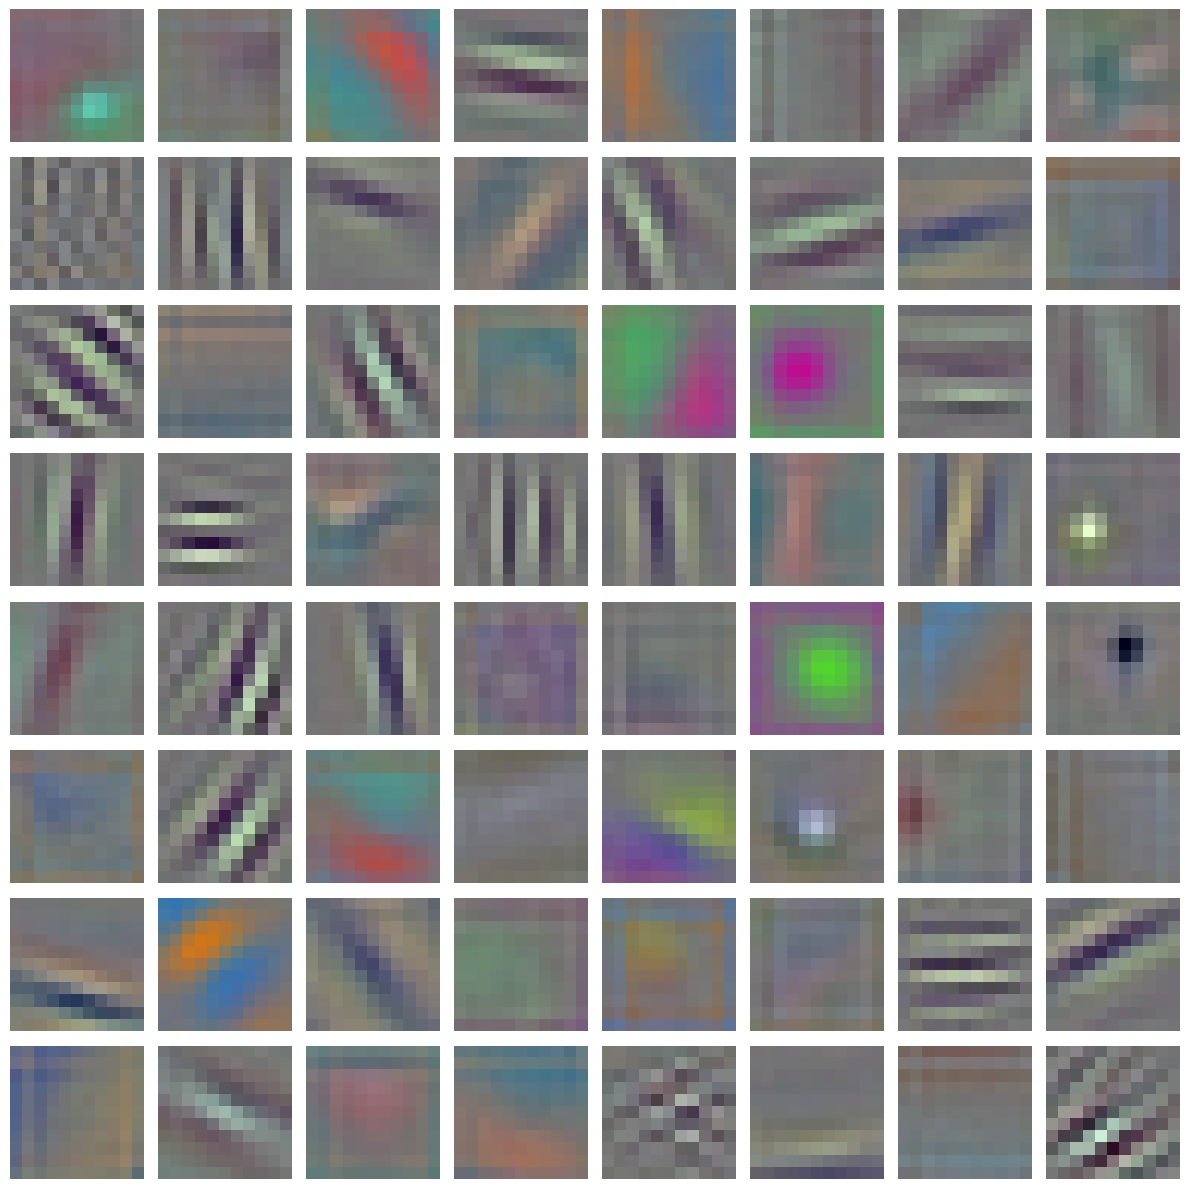

In [ ]:
# Color visualization

# Normalize filters
def normalize_filters(filters):
    min_val = filters.min()
    max_val = filters.max()
    return (filters - min_val) / (max_val - min_val)

normalized_filters = normalize_filters(filters)
print(normalized_filters[1].shape)

fig, axes = plt.subplots(8, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < normalized_filters.shape[0]:
        filter_img = np.transpose(normalized_filters[i], (1, 2, 0))  # Transpose to (Height, Width, Color)
        ax.imshow(filter_img)
    ax.axis('off')
plt.tight_layout()
plt.show()




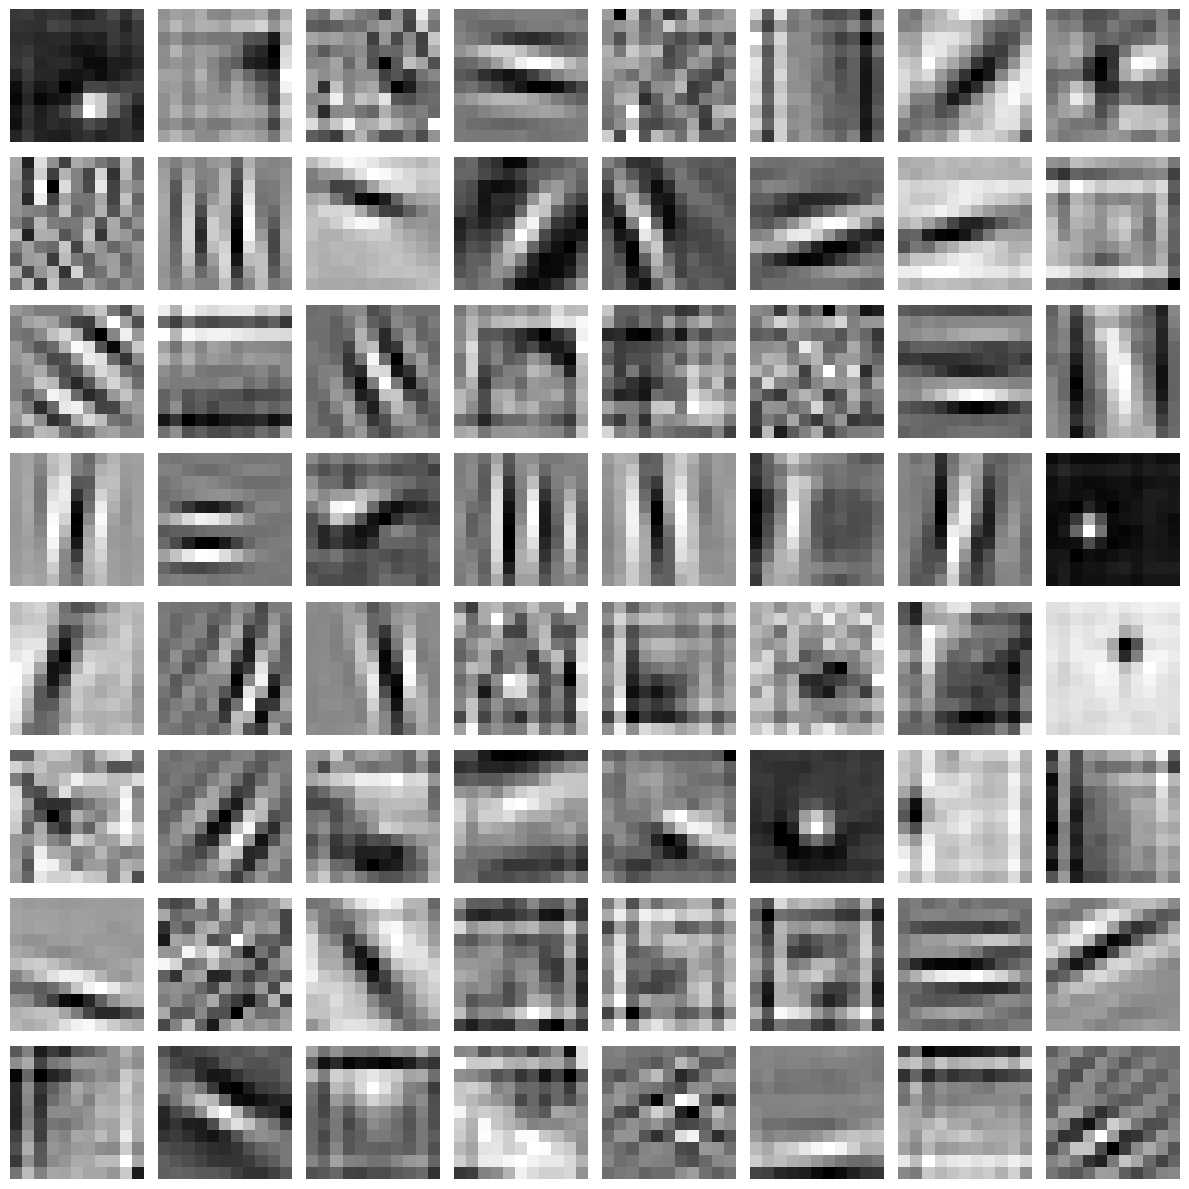

In [ ]:
# Visualization grayscale
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < normalized_filters.shape[0]:
        filter_img = filters[i, :, :, :].mean(axis=0)  # Average across RGB channels
        ax.imshow(filter_img, cmap="gray")
    ax.axis('off')
plt.tight_layout()
plt.show()